In [2]:
import cv2
import glob
import os
from tqdm import tqdm
import tifffile as tiff

In [ ]:
def resize_images(directory, size):
    # Get a list of all TIFF images in the directory
    images = glob.glob(os.path.join(directory, '*.tif'))

    # Loop over the images
    for image_file in tqdm(images):
        # Read the image
        image = tiff.imread(image_file)

        # Check if the image is not empty and is two-dimensional
        if image is not None and image.ndim == 2:
            # Resize the image
            resized_image = cv2.resize(image, (size, size))

            # Save the resized image
            cv2.imwrite(image_file, resized_image)
        else:
            print(f"Unable to read or resize image file: {image_file}")

# Define the size of the square
size = 520

# Resize the images in the train directory
resize_images('archive/fold_0/train', size)

# Resize the images in the val directory
resize_images('archive/fold_0/val', size)

In [37]:
images = glob.glob(os.path.join('archive/fold_0/val', '*_masks.tif'))

In [39]:
images[0]

'archive/fold_0/val/1ce663c98a16_masks.tif'

In [26]:
image = tiff.imread(images[0])


In [22]:
resized_image = cv2.resize(image, (520, 520))


error: OpenCV(3.4.18) /io/opencv/modules/imgproc/src/resize.cpp:3689: error: (-215:Assertion failed) !dsize.empty() in function 'resize'


In [21]:


cv2.imwrite(images[0], resized_image)

error: OpenCV(3.4.18) /io/opencv/modules/imgproc/src/resize.cpp:3689: error: (-215:Assertion failed) !dsize.empty() in function 'resize'


In [38]:
for image_file in tqdm(images):
    image = tiff.imread(images[0])

    resized_image = cv2.resize(image, (520, 520))

    cv2.imwrite(image_file, resized_image)

100%|██████████| 121/121 [00:00<00:00, 648.23it/s]


In [3]:
images = glob.glob(os.path.join('archive/fold_0/train', '*_masks.tif'))

In [5]:
image = tiff.imread(images[0])

(520, 520)

In [4]:
for image_file in tqdm(images):
    image = tiff.imread(images[0])

    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Save the grayscale image
    cv2.imwrite(image_file, gray_img)

  0%|          | 1/485 [00:00<00:16, 29.13it/s]


error: OpenCV(3.4.18) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:88: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


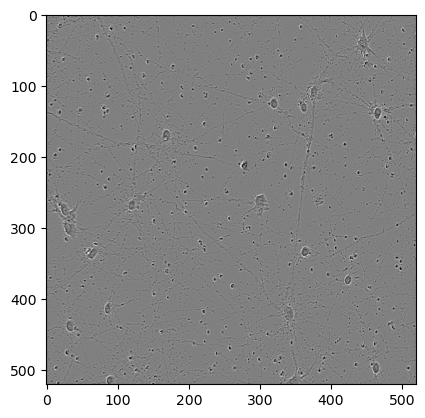

In [12]:
import matplotlib.pyplot as plt

plt.imshow(resized_image, cmap='gray')
plt.show()